# Camera Calibration for Advanced Lane Detection
The steps below calculates camera calibration parameters and uses them to correct undistort the distorted images.

In [5]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

horizontalCorners = 9
verticalCorners = 6


finalObjectPoints = [] # 3D points in real world space
finalImagePoints  = [] # 2D points in image plane

# Prepare object points 
objectPoints = np.zeros((horizontalCorners * verticalCorners, 3), np.float32)

# generate coordinates
objectPoints[:,:2] = np.mgrid[0:horizontalCorners, 0:verticalCorners].T.reshape(-1,2)

calibrationImagesFolder = 'camera_cal/calibration*.jpg'
calibrationImagesFileNames = glob.glob(calibrationImagesFolder)

for calibrationImageFileName in calibrationImagesFileNames:
    calibrationImage = mpimg.imread(calibrationImageFileName)
    
    grayCalibrationImage = cv2.cvtColor(calibrationImage, cv2.COLOR_RGB2GRAY)
    
    ret, corners = cv2.findChessboardCorners(
    grayCalibrationImage, (horizontalCorners, verticalCorners), None)
    
    if ret == True:
        finalImagePoints.append(corners)
        finalObjectPoints.append(objectPoints)
        
    calibrationImage = cv2.drawChessboardCorners(
                calibrationImage, (horizontalCorners, verticalCorners), corners, ret)
    

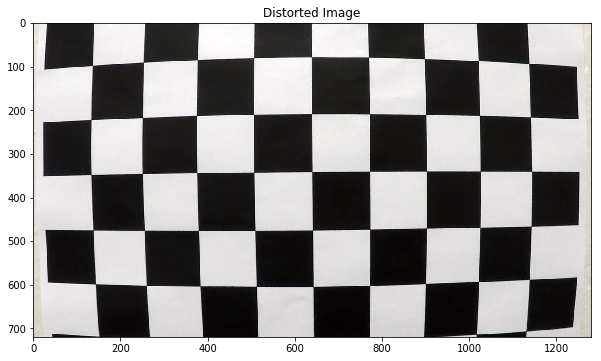

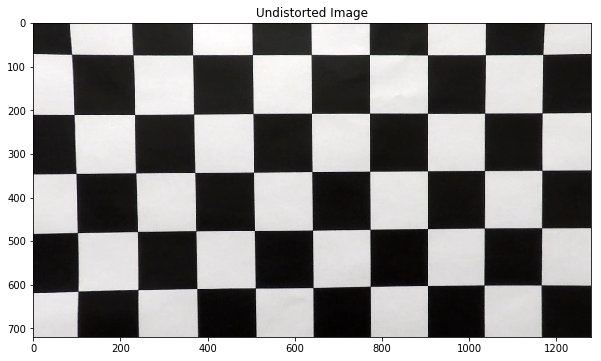

In [8]:
import pickle

# read a distorted image
distortedImage = mpimg.imread('camera_cal/calibration1.jpg')
plt.figure(figsize=(10,8))
plt.title('Distorted Image')
plt.imshow(distortedImage)

# calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(finalObjectPoints, finalImagePoints, distortedImage.shape[1::-1], None, None)

# undistort
undistortedImage = cv2.undistort(distortedImage, mtx, dist, None, mtx)
plt.figure(figsize=(10,8))
plt.title('Undistorted Image')
plt.imshow(undistortedImage)

# save distortion coefficients and the camera matrix
calibrationData = {"mtx": mtx, "dist" : dist }
pickle.dump(calibrationData, open("calibratedCameraData/cameraCalibrationData.p", "wb"))